Upload the CSV File

In [1]:
from google.colab import files
uploaded = files.upload()


Saving podcast_transcriptions_numberedSentences+English.csv to podcast_transcriptions_numberedSentences+English.csv


In [2]:
import pandas as pd

df_original = pd.read_csv('podcast_transcriptions_numberedSentences+English.csv')

df_cleaned = df_original.copy()

df_original.head()


,episode_name,duration_seconds,transcription,transcription-english
0,Go ikatisa morago ga go bona moento wa COVID19,498.98,1. eketshedimosetso ya kowid oitlisediwa ke m...,1. The spread of kowid is introduced by a fore...
1,Spunik not being accepted by SAHPRA,419.91,1. e\n2. ketshedimosetso ya kowid oitlisediwa...,1. Yes\n2. Kowid infection is reported by the ...
2,Pegelo ya DIGITAL VIBES e bontshang ka mo madi...,436.62,1. e\n2. ketshedimosetso ya kowid naoitlisediw...,1. Yes\n2. Disease prevention is carried out b...
3,School children_s mental health crisis during ...,559.32,1. e\n2. kitshedimosetso ya kowid noitlisediwa...,1. Yes\n2. Kowid's research is carried out by ...
4,Go rwesa batho baba sa entelwang COVID-19 mola...,423.75,1. e\n2. kekgatiso ya motswedinfm konka mo kam...,1. Yes\n2. the addition of the source in the f...


In [ ]:
# import string

# setswana_stopwords = {
#     'le', 'ka', 'go', 'ya', 'ke', 'ba', 'a', 'e', 'tsotlhe', 'mo', 'o', 're', 'sa',
#     'ke', 'ba', 'e', 'a', 'go', 'ya', 'le', 'mo', 'o', 'na', 're', 'bo', 'se', 'ga'
# }

# # Cleaning
# def clean_text(text):
#     if pd.isnull(text):
#         return ''
#     text = text.lower()
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     tokens = text.split()
#     tokens = [word for word in tokens if word not in setswana_stopwords and len(word) > 2]
#     return ' '.join(tokens)

# # Cleaning the transcript column
# df_cleaned['cleaned_transcription'] = df_cleaned['transcription'].apply(clean_text)

# df_cleaned[['transcription', 'cleaned_transcription']].head()



,transcription,cleaned_transcription
0,eketshedimosetso ya kowid oitlisediwa ke mots...,eketshedimosetso kowid oitlisediwa motswedinya...
1,e ketshedimosetso ya kowid oitlisediwa ke mot...,ketshedimosetso kowid oitlisediwa motswedinya ...
2,e ketshedimosetso ya kowid naoitlisediwa ke mo...,ketshedimosetso kowid naoitlisediwa motswediny...
3,e kitshedimosetso ya kowid noitlisediwa ke mot...,kitshedimosetso kowid noitlisediwa motswedinya...
4,e kekgatiso ya motswedinfm konka mo kamooso eg...,kekgatiso motswedinfm konka kamooso egopiolo k...


In [5]:
!pip install -U gensim nltk scipy


import pandas as pd
import string
import gensim
from gensim import corpora
import nltk
from nltk.tokenize import word_tokenize
from gensim.models.ldamodel import LdaModel


df_original = pd.read_csv('podcast_transcriptions.csv')

df_cleaned = df_original.copy()


setswana_stopwords = {
    'le', 'ka', 'go', 'ya', 'ke', 'ba', 'a', 'e', 'tsotlhe', 'mo', 'o', 're', 'sa',
    'ke', 'ba', 'e', 'a', 'go', 'ya', 'le', 'mo', 'o', 'na', 're', 'bo', 'se', 'ga'
}

# Cleaning
def clean_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in setswana_stopwords and len(word) > 2]
    return ' '.join(tokens)

# Cleaning the transcript column
df_cleaned['cleaned_transcription'] = df_cleaned['transcription'].apply(clean_text)



nltk.download('punkt')

# Tokenize cleaned transcripts
tokenized_cleaned = df_cleaned['cleaned_transcription'].dropna().apply(word_tokenize)

# Create dictionary and corpus for LDA
dictionary_cleaned = corpora.Dictionary(tokenized_cleaned)
dictionary_cleaned.filter_extremes(no_below=5, no_above=0.5)

corpus_cleaned = [dictionary_cleaned.doc2bow(text) for text in tokenized_cleaned]

# train

# Set number of topics
NUM_TOPICS = 5

lda_model_cleaned = LdaModel(
    corpus=corpus_cleaned,
    id2word=dictionary_cleaned,
    num_topics=NUM_TOPICS,
    random_state=42,
    passes=15,
    per_word_topics=True
)

ModuleNotFoundError: No module named 'gensim'

In [ ]:
# from gensim.models.ldamodel import LdaModel

# # Set number of topics
# NUM_TOPICS = 5

# lda_model_cleaned = LdaModel(
#     corpus=corpus_cleaned,
#     id2word=dictionary_cleaned,
#     num_topics=NUM_TOPICS,
#     random_state=42,
#     passes=15,
#     per_word_topics=True
# )


In [ ]:
topics = lda_model_cleaned.print_topics(num_words=10)
for idx, topic in enumerate(topics):
    print(f"🔸 Topic {idx + 1}: {topic[1]}")


🔸 Topic 1: 0.023*"gore" + 0.006*"bona" + 0.005*"batho" + 0.003*"tsa" + 0.003*"mme" + 0.002*"moento" + 0.002*"kohid" + 0.002*"ento" + 0.002*"nne" + 0.002*"kowid"
🔸 Topic 2: 0.005*"gore" + 0.004*"batho" + 0.003*"bona" + 0.002*"kwa" + 0.002*"tsa" + 0.002*"entiwa" + 0.002*"kajalo" + 0.001*"kohid" + 0.001*"bagi" + 0.001*"bobedi"
🔸 Topic 3: 0.002*"gore" + 0.002*"batho" + 0.001*"tsa" + 0.001*"bona" + 0.001*"enta" + 0.001*"matsuma" + 0.001*"mme" + 0.001*"motho" + 0.001*"kwa" + 0.001*"molaong"
🔸 Topic 4: 0.059*"gore" + 0.011*"mme" + 0.011*"bona" + 0.008*"batho" + 0.007*"ento" + 0.006*"moento" + 0.005*"kapa" + 0.004*"nne" + 0.004*"bone" + 0.004*"tsa"
🔸 Topic 5: 0.046*"gore" + 0.012*"bona" + 0.010*"bana" + 0.010*"mme" + 0.006*"ento" + 0.006*"nne" + 0.005*"tsa" + 0.005*"batho" + 0.004*"bone" + 0.003*"moento"


In [ ]:
print("Perplexity:", lda_model_cleaned.log_perplexity(corpus_cleaned))


Perplexity: -9.126394259154837


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_cleaned,
                                      texts=tokenized_cleaned,
                                      dictionary=dictionary_cleaned,
                                      coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score (c_v):', coherence_lda)


Coherence Score (c_v): 0.26638899731258814


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# UMass
coherence_umass = CoherenceModel(
    model=lda_model_cleaned,
    corpus=corpus_cleaned,
    dictionary=dictionary_cleaned,
    coherence='u_mass'
).get_coherence()

print('UMass Coherence:', coherence_umass)

# NPMI
coherence_npmi = CoherenceModel(
    model=lda_model_cleaned,
    texts=tokenized_cleaned,
    dictionary=dictionary_cleaned,
    coherence='c_npmi'
).get_coherence()

print('NPMI Coherence:', coherence_npmi)


UMass Coherence: -1.422771427427655
NPMI Coherence: -0.09304064244902967


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model_cleaned, texts=tokenized_cleaned, dictionary=dictionary_cleaned, coherence='u_mass')
print("UMass Coherence:", coherence_model.get_coherence())

coherence_model_npmi = CoherenceModel(model=lda_model_cleaned, texts=tokenized_cleaned, dictionary=dictionary_cleaned, coherence='c_npmi')
print("NPMI Coherence:", coherence_model_npmi.get_coherence())

print("Perplexity:", lda_model_cleaned.log_perplexity(corpus_cleaned))


UMass Coherence: -1.2361347533714442
NPMI Coherence: -0.35404908825672093
Perplexity: -6.15054313011207


In [ ]:
lda_model = LdaModel(
    corpus=corpus_cleaned,
    id2word=dictionary_cleaned,
    num_topics=10,
    random_state=42,
    passes=20,
    alpha='auto',
    eta='auto'
)


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=tokenized_cleaned, dictionary=dictionary_cleaned, coherence='u_mass')
print("UMass Coherence:", coherence_model.get_coherence())

coherence_model_npmi = CoherenceModel(model=lda_model, texts=tokenized_cleaned, dictionary=dictionary_cleaned, coherence='c_npmi')
print("NPMI Coherence:", coherence_model_npmi.get_coherence())

print("Perplexity:", lda_model.log_perplexity(corpus_cleaned))


UMass Coherence: -1.7256041936205897
NPMI Coherence: -0.37891553699321795
Perplexity: -6.190416296712947


In [ ]:
from gensim.models import Phrases

phrases = Phrases(tokenized_cleaned, min_count=5, threshold=10)
bigram = Phrases(phrases[tokenized_cleaned])
tokenized_cleaned = [bigram[doc] for doc in tokenized_cleaned]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model_cleaned, texts=tokenized_cleaned, dictionary=dictionary_cleaned, coherence='u_mass')
print("UMass Coherence:", coherence_model.get_coherence())

coherence_model_npmi = CoherenceModel(model=lda_model_cleaned, texts=tokenized_cleaned, dictionary=dictionary_cleaned, coherence='c_npmi')
print("NPMI Coherence:", coherence_model_npmi.get_coherence())

print("Perplexity:", lda_model_cleaned.log_perplexity(corpus_cleaned))


UMass Coherence: -1.8122256092560067
NPMI Coherence: -0.39715430800770163
Perplexity: -6.1505525556429355


In [2]:
# !pip install -U gensim nltk scipy


import pandas as pd
import string
import nltk
import gensim
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import nltk

nltk.download('punkt_tab')


# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

# 🔄 Load your uploaded CSV
df = pd.read_csv('podcast_transcriptions_numberedSentences+English.csv')

# 🧼 Clean the English transcripts
def clean_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in english_stopwords and len(word) > 2]
    return ' '.join(tokens)

df['cleaned'] = df['transcription-english'].apply(clean_text)
tokenized = df['cleaned'].dropna().apply(word_tokenize)

# 📚 Create dictionary and corpus
dictionary = corpora.Dictionary(tokenized)
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in tokenized]

# 🧠 Train LDA Model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    passes=20,
    random_state=42,
    alpha='auto',
    eta='auto'
)

# 🧪 Evaluate coherence and perplexity
coherence_umass = CoherenceModel(model=lda_model, texts=tokenized, dictionary=dictionary, coherence='u_mass').get_coherence()
coherence_npmi = CoherenceModel(model=lda_model, texts=tokenized, dictionary=dictionary, coherence='c_npmi').get_coherence()
perplexity = lda_model.log_perplexity(corpus)

print("🔍 Coherence (UMass):", coherence_umass)
print("🔍 Coherence (NPMI):", coherence_npmi)
print("🤯 Perplexity:", perplexity)

# 🧾 View topics
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"🔸 Topic {idx + 1}: {topic}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🔍 Coherence (UMass): -1.6765960510114806
🔍 Coherence (NPMI): -0.29931009954562315
🤯 Perplexity: -7.327386065967526
🔸 Topic 1: 0.009*"use" + 0.007*"women" + 0.005*"pregnant" + 0.005*"house" + 0.005*"tell" + 0.004*"number" + 0.004*"world" + 0.004*"prevent" + 0.004*"used" + 0.004*"ability"
🔸 Topic 2: 0.011*"jonson" + 0.010*"johnson" + 0.007*"injection" + 0.006*"body" + 0.006*"child" + 0.005*"first" + 0.005*"second" + 0.005*"house" + 0.005*"world" + 0.004*"live"
🔸 Topic 3: 0.014*"money" + 0.006*"long" + 0.006*"internet" + 0.006*"health" + 0.006*"diseases" + 0.005*"use" + 0.005*"services" + 0.005*"buy" + 0.005*"disease" + 0.005*"truth"
🔸 Topic 4: 0.008*"child" + 0.006*"vaccinate" + 0.005*"back" + 0.005*"things" + 0.005*"school" + 0.005*"schools" + 0.005*"sure" + 0.004*"thats" + 0.004*"disease" + 0.004*"cant"
🔸 Topic 5: 0.011*"bit" + 0.007*"ones" + 0.006*"use" + 0.005*"statistics" + 0.005*"vaccination" + 0.005*"understand" + 0.005*"work" + 0.005*"looking" + 0.005*"first" + 0.004*"vaccinate"


🔸 Topic #1: bit province slow nte fourth treatment interior tri omikhlon times ahead daughter wave mohela mn
🔸 Topic #2: children vaccine time dont going vaccinated middle let africa kohid good mother need use like
🔸 Topic #3: continued requirements professional certificates possibility bandits alive election tanafo eye tests walk wes ive raiti
🔸 Topic #4: continued requirements bit province tanafo professional election slow ive relationships bandits table walk certificates blood



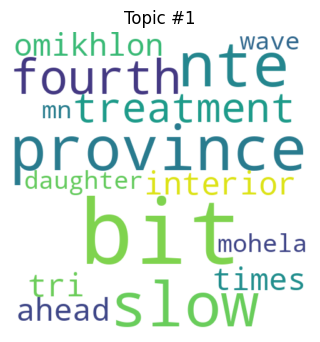

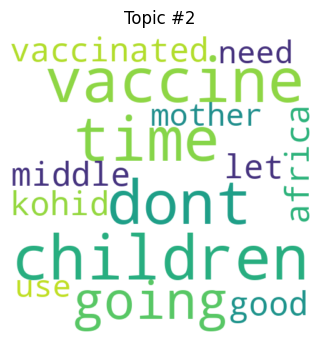

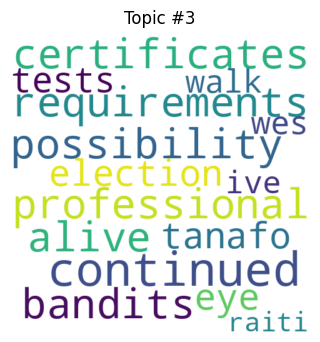

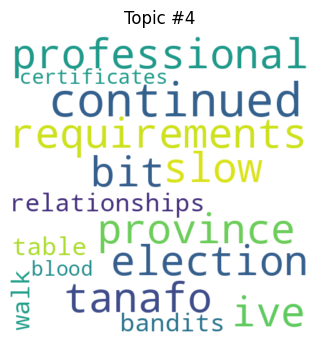

In [3]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# # Load CSV with translated transcripts
# df = pd.read_csv('/mnt/data/podcast_translations.csv')
# 🔄 Load your uploaded CSV
df = pd.read_csv('podcast_transcriptions_numberedSentences+English.csv')

# Basic text cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Cleaned English transcripts
df['cleaned'] = df['transcription-english'].apply(clean_text)

# TF-IDF with built-in English stopwords
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Train LDA model
def fit_LDA(X, n_components):
    lda = LatentDirichletAllocation(n_components=n_components, random_state=0)
    lda.fit(X)
    return lda

n_components = 4
num_top_words = 15
lda_model = fit_LDA(X_dtm_tfidf, n_components)

# Print top words per topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(f"🔸 Topic #{topic_idx + 1}: {top_words}")
    print()

print_top_words(lda_model, tfidf_feature_names, num_top_words)

# Visualize with word clouds
def wordcloud_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        cloud_text = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        wordcloud = WordCloud(width=480, height=480, margin=0, background_color='white').generate(cloud_text)
        fig, ax = plt.subplots(figsize=(3, 3))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        plt.tight_layout(pad=0)
        plt.title(f"Topic #{topic_idx + 1}")
        plt.show()

wordcloud_top_words(lda_model, tfidf_feature_names, num_top_words)
